# 030.KNN (K-Nearest Neighbors, 최근접 이웃)

### iris dataset

iris.feature_names : 

Sepal Length : 꽃받침 길이  
Sepal Width  : 꽃받침 너비   
Petal Length  : 꽃잎 길이  
Petal Width   :  꽃잎 너비 

Species (꽃의 종류) :  setosa / versicolor / virginica 의 3종류로 구분된다.

**꽃받침 길이, 너비 두가지 feature 를 가지고 KNN 알고리즘을 이용하여 꽃의 종류 분류**

**neighbors.KNeighborsClassifier(n_neighbors, weights=weights)**

- weights :  

    - uniform : uniform weights. 모든 neighbor 의 가중치를 동일하게 취급  
    - distance : neighbor 의 거리에 반비례하여 가중치 조정

In [2]:
import numpy as np
from sklearn import neighbors, datasets

In [3]:
iris = datasets.load_iris()

print(iris.data.shape)
print(iris.feature_names)
print(iris.target_names)

(150, 4)
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


In [4]:
# 꽃받침 길이, 너비 두가지 feature 선택
X = iris.data[:, :2]
y = iris.target

print(X[:5])
print()
print(y[:5])

[[5.1 3.5]
 [4.9 3. ]
 [4.7 3.2]
 [4.6 3.1]
 [5.  3.6]]

[0 0 0 0 0]


In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

### KNN object 생성 및 train

In [6]:
clf = neighbors.KNeighborsClassifier(n_neighbors=15, weights='uniform')
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                     weights='uniform')

In [7]:
y_predict = clf.predict(X_test)
y_predict

array([2, 2, 2, 0, 2, 2, 1, 2, 0, 2, 1, 0, 0, 1, 1, 0, 0, 0, 1, 2, 0, 1,
       1, 1, 0, 1, 2, 1, 2, 0, 0, 2, 2, 0, 2, 0, 0, 0])

In [8]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_predict)

array([[15,  0,  0],
       [ 0,  8,  8],
       [ 0,  2,  5]], dtype=int64)

## Visualization

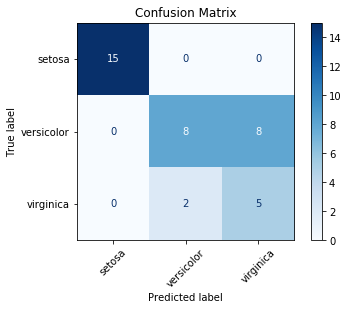

In [9]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

disp = plot_confusion_matrix(clf, X_test, y_test, 
                                          display_labels=iris.target_names,
                                          cmap=plt.cm.Blues)
disp.ax_.set_title("Confusion Matrix")
disp.ax_.set_xticklabels(iris.target_names, rotation=45)
plt.show()

### 예측의 정확도 평가

In [10]:
from sklearn.metrics import accuracy_score

In [11]:
accuracy_score(y_test, y_predict)

0.868421052631579

# 실습

n_neighbors 를 변경하여 Test. Visualization 을 통하여 위 결과와 비교.

In [ ]:
clf = neighbors.KNeighborsClassifier(n_neighbors=20, weights='uniform')

# your code here

y_predict = clf.predict(X_test)
print("accuracy = {}".format(accuracy_score(y_test, y_predict)))